<body >
    <div style="direction:rtl;line-height:300%;background-color:rgb(255, 255, 255);">
            <img src="./images/Fanni-Transparent.png" style="position:reletive;margin-top:25pt;float:right;" width="200" height="200"/>
    <img src="./images/University_of_Tehran_logo.svg" style="position:reletive;margin-top:25pt;margin-left:20pt;float:left;" width="150" height="150"/>
		<div align=center>
			<font  size=5 >
				<p></p>
				<p></p>
                <br>
                 بسمه تعالی
				<p></p>
			</font>
		</div>
        <div align=center >
                        <font size=30 >
                            <br>
                            گزارش همورک سوم
                        </font>
         </div>
           <div align=center >
                        <font size=3 >
                            <br>
تهیه و تنظیم : سپهر سعیدپور
                            <br>
۸۱۰۱۹۶۶۵۴
                        </font>
        </div>
    </div>
</body>

# Question ۱

<div dir="rtl">

## سوال ۱

<ul>
  <li> نرمال کردن داده‌ها به طور کلی روی دقت مدل و سرعت ترین شدن مدل تاثیر گذار است. اما نکته مهم این است که در مدل‌های مختلف ماشین‌لرنینگی این تاثیر متفاوت است.</li>
    <li> در مدل‌هایی که با روش‌های گرادیانی ترین می‌شوند مانند نورال نتورک و رگرشن. به دلیل اینکه گرادیان در یک زیرفضای کوچک‌تری انجام می‌شود سرعت را افرایش می‌دهد. همینطور مقادیر زیاد و ناموزون در شبکه عصبی باعث اشباع شدن تابع‌های فعال‌سازی می‌شود. که این هم روی دقت مدل تاثیر دارد.</li>
    <li> همینطور در مدل‌ها این افزایش سرعت گرادیان باعث می‌شود که الگوریتم سریع‌تر به مقدار اپتیمم نزدیک شود. و این یعنی به طور کلی به دقت بهتری خواهد رسید.</li>
    <li> در این لینک <a href = "https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0">link </a> به خوبی این مسئله توضیح داده شده است. </li>
</ul>
    


</div>

<div dir="rtl">

## سوال ۲

<ul>
  <li>دراپ‌اوت روشی در یادگیری عمیق است که با آن می‌توان از فرابرازش داده‌ها جلوگیری کرد. </li>
    <li>در این روش به هر کدام از نورون‌های شبکه یک احتمالی اختصاص داده می‌شود که در واقع احتمال کنار گذاشته شدن آن نورون است. روش‌های مختلفی برای پیاده‌سازی دراپ‌اوت است که بیشتر با توزیع‌های مختلف احتمال روی نورون‌ها به کار می‌رود. مثلا از برنولی برای انتخاب کردن یا نکردن یک نورون استفاده می‌شود و بعد از آن با اختصاص این احتمال شبکه شروع به یادگیری می‌کند و نتیجه باعث می‌شود که مدل ما به خوبی برازش شود.  </li>
    <li> در این <a href = "https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf">link </a> مقاله جفری هینتون آمده‌است که به خوبی این دراپ‌اوت را توضیح میدهد. </li>
    
</ul>


</div>

<div dir="rtl">

## سوال ۳

<ul>
  <li> به این معناست که مدل ما واریانس کمی دارد و این نکته مثبت و خوبی برای ما است</li>
    <li>  </li>
    <li> </li>
    
</ul>


</div>

# Question 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from numpy import linalg as LA


In [550]:
class Neural_Network(object):
    def __init__(self, in_size, h_size, out_size, activation_type = 'Tanh'):        
        self.inputLayerSize = in_size
        self.outputLayerSize = out_size
        self.hiddenLayerSize = h_size
        self.activation_type = activation_type
        
    def init_weight(self):
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize) / np.sqrt(self.inputLayerSize)
        self.b1 = np.zeros((1, self.hiddenLayerSize)) 
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize) /  np.sqrt(self.hiddenLayerSize)
        self.b2 = np.zeros((1, self.outputLayerSize)) 
        
    def activation_function(self, Z ,deri = False):
        
        type = self.activation_type
        if type == 'ReLU':
            if deri == True:
                return np.array([1 if i>0 else 0 for i in np.squeeze(Z)])
            else:
                return np.array([i if i>0 else 0 for i in np.squeeze(Z)])
        elif type == 'Sigmoid':
            if deri == True:
                return 1/(1+np.exp(-Z))*(1-1/(1+np.exp(-Z)))
            else:
                return 1/(1+np.exp(-Z))
        elif type == 'Tanh':
            if deri == True:
                return np.tanh(Z)
            else:
                return 1-(np.tanh(Z))**2
        else:
            raise TypeError('Invalid type!')
        
    def forward_propagate(self, X):
        self.z2 = np.dot(X, (self.W1 )) + self.b1
        self.a2 = self.activation_function(self.z2)
        self.z3 = np.dot(self.a2, (self.W2 )) + self.b2
        score = self.activation_function(self.z3)
        return score
    
    def predict(self, X_test):
        
        y_predict_onehot = self.forward_propagate(X_test)
        y_predict = np.argmax(np.array(y_predict_onehot), axis = 1)
        
        return y_predict
        
    
    def cost_function(self, X, y):

        self.yHat = self.forward_propagate(X)
        J = (0.5 / X.shape[0]) * np.sum(np.sum((y-self.yHat)**2))
        return J
    
    def cost_function_prime(self, X, y):
        
        self.yHat = self.forward_propagate(X)
        
        delta3 = np.multiply( -(1/ X.shape[0]) * (y - self.yHat), self.activation_function(self.z3, deri = True))
        
        dJdb2 = np.sum(delta3, axis=0, keepdims=True)
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T) * self.activation_function(self.z2, deri = True)
        
        dJdb1 = np.sum(delta2, axis=0, keepdims=True)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdb1, dJdW2, dJdb2
    
            
    def load_weight(self):
        
        return self.W1, self.b1, self.W2, self.b2
    
    def fit(self,X, y, X_validation, y_validation,
            num_epochs = 10, batch_size=200, learning_rate = 0.001,
            learning_rate_decay = 0.95, verbose=False):
        
        standard_scaler = preprocessing.StandardScaler()

        
        X_validation = np.array(X_validation)
#         X_validation = standard_scaler.fit_transform(X_validation)
        
        y_validation = np.array(y_validation)
        
        num_train = X.shape[0]
        iterations_per_epoch = int(num_train / batch_size)
        
        cost_history = []
        train_acc_history = []
        val_acc_history = []
    
        for i in range(1, num_epochs * iterations_per_epoch + 1):
            np.random.seed(0)
            sample_index = np.random.choice(num_train, batch_size, replace=True)   
            X_batch = X.iloc[sample_index, :]
            X_batch = np.array(X_batch)
            
#             X_batch = standard_scaler.fit_transform(X_batch)
            
            y_batch = y.iloc[sample_index]
            
            y_batch_onehot = np.array(pd.get_dummies(y_batch.iloc[:,0]))

            
            cost = self.cost_function(X_batch, y_batch_onehot)
            cost_history.append(cost)
            
            dJdW1, dJdb1, dJdW2, dJdb2 = self.cost_function_prime(X_batch, y_batch_onehot)
            
            self.W2 = self.W2 + learning_rate * dJdW2 
            self.b2 = self.b2 + learning_rate * dJdb2
            self.W1 = self.W1 + learning_rate * dJdW1
            self.b1 = self.b1 + learning_rate * dJdb1
            
            if verbose and i % iterations_per_epoch == 0:    
                epoch = i / iterations_per_epoch
                train_acc = (self.predict(X_batch) == np.array(y_batch)).mean()    
                val_acc = (self.predict(X_validation) == np.array(y_validation)).mean()    
                train_acc_history.append(train_acc)    
                val_acc_history.append(val_acc)    
                print("epoch %d / %d: cost %f, train_acc: %f, val_acc: %f" % 
                                    (epoch, num_epochs, cost, train_acc, val_acc))
                
                learning_rate *= learning_rate_decay 
                
        return {   
            'cost_history': cost_history,   
            'train_acc_history': train_acc_history,   
            'val_acc_history': val_acc_history
        }


In [560]:
X_training, y_training = pd.read_csv("DataSet2/Reduced_Train_Data.csv", header=None), pd.read_csv("DataSet2/trainLabels.csv", header=None)

X_training = pd.DataFrame(standard_scaler.fit_transform(X_training))

X_test, y_test = pd.read_csv("DataSet2/Reduced_Test_Data.csv", header=None), pd.read_csv("DataSet2/testLabels.csv", header=None)


X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.05)

standard_scaler = preprocessing.StandardScaler()


# X_train, X_val, y_train, y_val = X_train.reset_index(), X_val.reset_index(), y_train.reset_index(), y_val.reset_index()

m_train = X_train.shape[0]
m_test = X_test.shape[0]


input_layer_size = X_train.shape[1]
output_layer_size = y_train_onehot.shape[1]

In [564]:
NN = Neural_Network(in_size= input_layer_size, h_size= 150, out_size= output_layer_size, activation_type= "Tanh")
NN.init_weight()
stats = NN.fit(X_train, y_train, X_val, y_val,
                num_epochs = 10, batch_size=1024, learning_rate = 0.001,
                learning_rate_decay = 0.95, verbose=True)

epoch 1 / 10: cost 1.416242, train_acc: 0.095332, val_acc: 0.099335
epoch 2 / 10: cost 0.687352, train_acc: 0.098071, val_acc: 0.099558
epoch 3 / 10: cost 0.566835, train_acc: 0.100037, val_acc: 0.099901
epoch 4 / 10: cost 0.534521, train_acc: 0.101027, val_acc: 0.100126
epoch 5 / 10: cost 0.521940, train_acc: 0.101629, val_acc: 0.100242
epoch 6 / 10: cost 0.516029, train_acc: 0.101932, val_acc: 0.100311
epoch 7 / 10: cost 0.512964, train_acc: 0.102068, val_acc: 0.100370
epoch 8 / 10: cost 0.511298, train_acc: 0.102233, val_acc: 0.100391
epoch 9 / 10: cost 0.510386, train_acc: 0.102311, val_acc: 0.100416
epoch 10 / 10: cost 0.509906, train_acc: 0.102401, val_acc: 0.100426


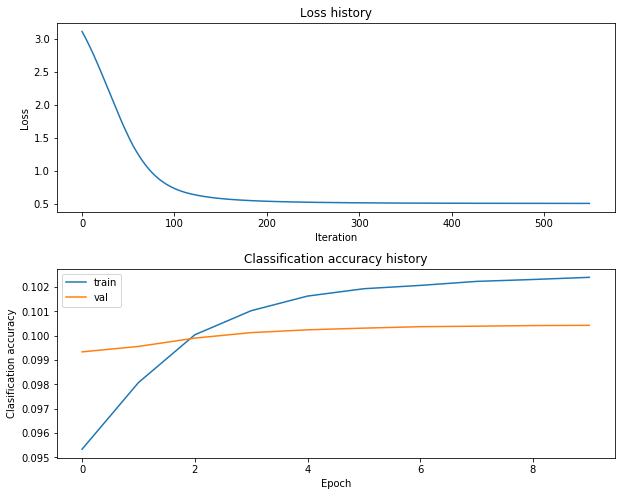

In [565]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)


# Plot the loss function and train / validation accuracies

plt.subplot(2, 1, 1)
plt.plot(stats['cost_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


In [566]:
NN = Neural_Network(in_size= input_layer_size, h_size= 100, out_size= output_layer_size, activation_type= "Tanh")
NN.init_weight()
stats = NN.fit(X_train, y_train, X_val, y_val,
                num_epochs = 10, batch_size=1024, learning_rate = 0.1,
                learning_rate_decay = 0.95, verbose=True)

epoch 1 / 10: cost 0.544881, train_acc: 0.103042, val_acc: 0.100507
epoch 2 / 10: cost 0.527037, train_acc: 0.103147, val_acc: 0.100343
epoch 3 / 10: cost 0.488946, train_acc: 0.104903, val_acc: 0.100280
epoch 4 / 10: cost 0.463787, train_acc: 0.105480, val_acc: 0.100341
epoch 5 / 10: cost 0.459241, train_acc: 0.105061, val_acc: 0.100443
epoch 6 / 10: cost 0.467527, train_acc: 0.104596, val_acc: 0.100410
epoch 7 / 10: cost 0.477407, train_acc: 0.104263, val_acc: 0.100386
epoch 8 / 10: cost 0.483557, train_acc: 0.103476, val_acc: 0.100340
epoch 9 / 10: cost 0.485949, train_acc: 0.103181, val_acc: 0.100289
epoch 10 / 10: cost 0.486388, train_acc: 0.103312, val_acc: 0.100244


In [567]:
NN = Neural_Network(in_size= input_layer_size, h_size= 300, out_size= output_layer_size, activation_type= "Tanh")
NN.init_weight()
stats = NN.fit(X_train, y_train, X_val, y_val,
                num_epochs = 10, batch_size=1024, learning_rate = 0.1,
                learning_rate_decay = 0.95, verbose=True)

epoch 1 / 10: cost 0.514192, train_acc: 0.100526, val_acc: 0.100389
epoch 2 / 10: cost 0.486868, train_acc: 0.103551, val_acc: 0.100615
epoch 3 / 10: cost 0.468969, train_acc: 0.103272, val_acc: 0.100667
epoch 4 / 10: cost 0.462539, train_acc: 0.103412, val_acc: 0.100640
epoch 5 / 10: cost 0.464623, train_acc: 0.103377, val_acc: 0.100570
epoch 6 / 10: cost 0.467712, train_acc: 0.103481, val_acc: 0.100446
epoch 7 / 10: cost 0.468858, train_acc: 0.103389, val_acc: 0.100426
epoch 8 / 10: cost 0.468755, train_acc: 0.103474, val_acc: 0.100358
epoch 9 / 10: cost 0.468227, train_acc: 0.103428, val_acc: 0.100396
epoch 10 / 10: cost 0.467575, train_acc: 0.103688, val_acc: 0.100370


# Question 3

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

standard_scaler = preprocessing.StandardScaler()
from sklearn.metrics import confusion_matrix

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
X_training, y_training = pd.read_csv("DataSet2/Reduced_Train_Data.csv", header=None), pd.read_csv("DataSet2/trainLabels.csv", header=None)
X_test, y_test = pd.read_csv("DataSet2/Reduced_Test_Data.csv", header=None), pd.read_csv("DataSet2/testLabels.csv", header=None)

In [16]:
split = int(0.8 * len(X_training))
index_list = list(range(len(X_training)))
train_idx, valid_idx = index_list[:split], index_list[split:]

In [35]:
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)

In [38]:
X_trainloader = DataLoader(X_training, batch_size=256, sampler=tr_sampler)
X_validloader = DataLoader(X_training, batch_size=256, sampler=val_sampler)

y_trainloader = DataLoader(y_training, batch_size=256, sampler=tr_sampler)
y_validloader = DataLoader(y_training, batch_size=256, sampler=val_sampler)

In [ ]:
class CNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.Tanh(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        
        out = self.fc3(out)
        
        return out

In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.Sigmoid(),
                      nn.Linear(128, 64),
                      nn.Sigmoid(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")